# Notebook responsável por gerar o modelo autorregressivo

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sktime.datasets import load_airline
from statsmodels.tsa.ar_model import AutoReg
from sktime.forecasting.base import ForecastingHorizon

## Geração da visualização dos dados "Box & Jenkins airline data"

In [2]:
y = load_airline()
df = y.to_frame().reset_index()
df

,Period,Number of airline passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0


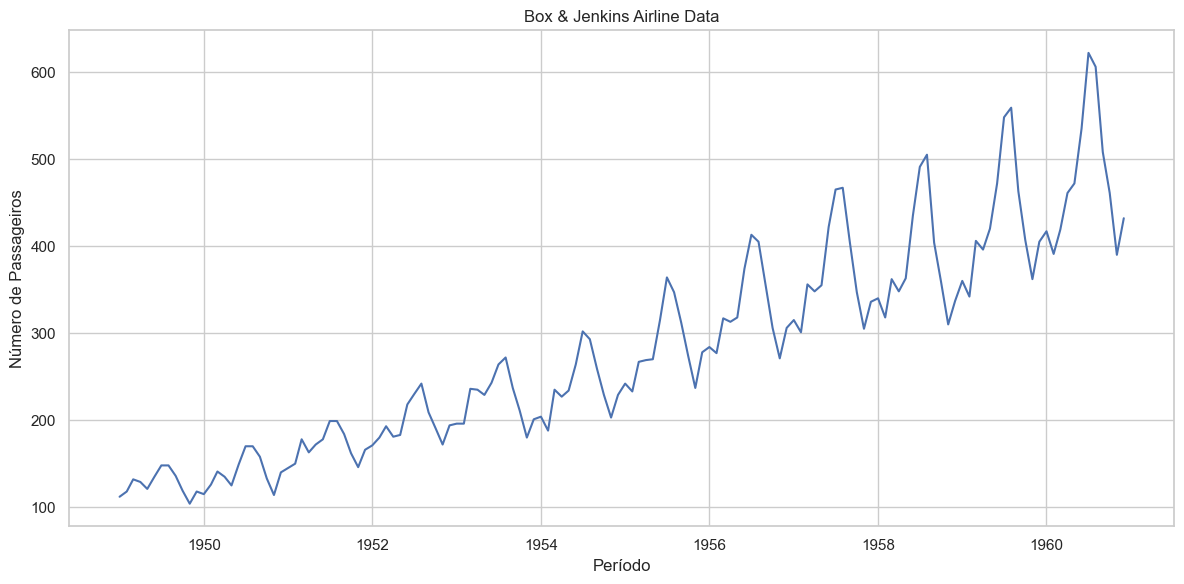

In [3]:
# Configurando o estilo do gráfico
sns.set(style="whitegrid")

# Convertendo os períodos para datetime para facilitar a visualização
df['Period'] = df['Period'].dt.to_timestamp()

# Criando a visualização
plt.figure(figsize=(12, 6))
sns.lineplot(x="Period", y='Number of airline passengers', data=df)
plt.title('Box & Jenkins Airline Data')
plt.xlabel('Período')
plt.ylabel('Número de Passageiros')

plt.tight_layout()

# Salvando a figura no diretório especificado
plt.savefig('../figs/06 - Box_Jenkins_Airline_Data.png')

# Exibindo o gráfico
plt.show()

## Construindo o forecast usando AutoAR (usando 12 meses para predizer os próximos 12)

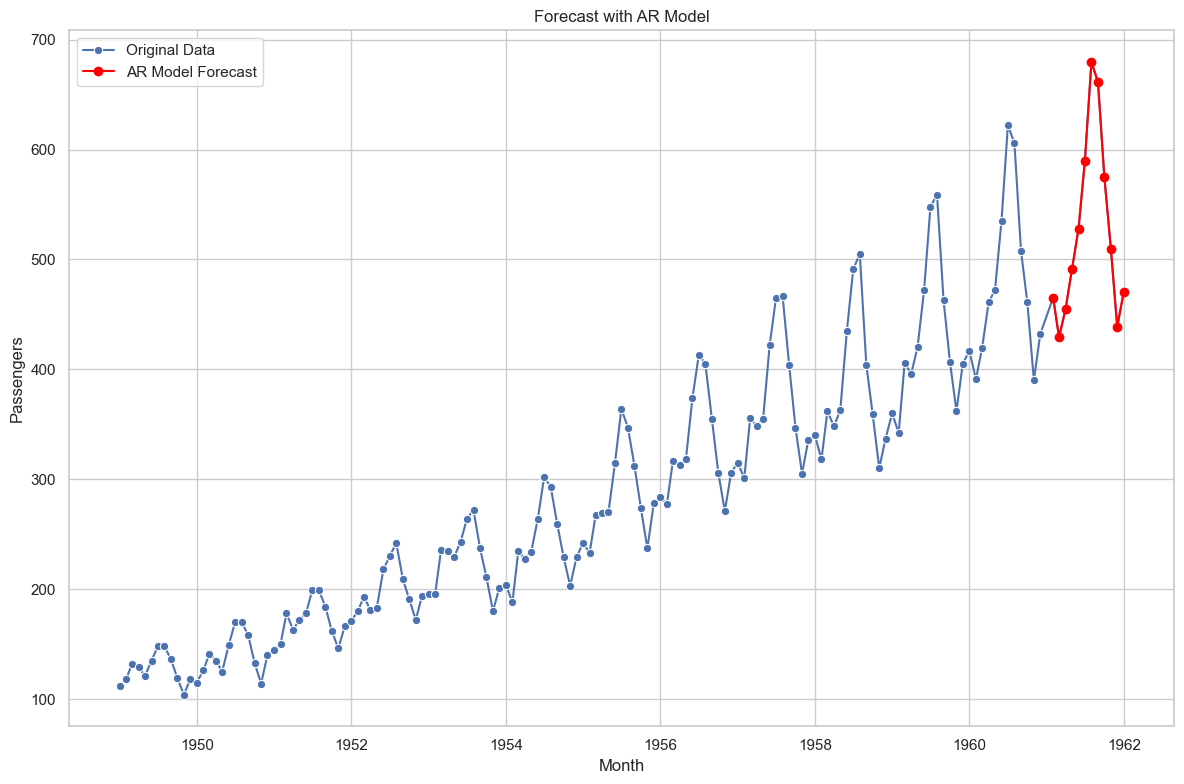

In [4]:
# Ajustar o modelo autorregressivo
model = AutoReg(y, lags=12).fit()

# Prever os próximos 12 meses
y_future_pred = model.predict(start=len(y), end=len(y) + 11)

# Preparar DataFrame para plotagem
forecast_index = pd.date_range(start=df['Period'].iloc[-1] + pd.DateOffset(months=1), periods=12, freq='M')
forecast_df = pd.DataFrame({'Period': forecast_index, 'Number of airline passengers': y_future_pred})

# Concatenar os dados originais com a previsão
full_df = pd.concat([df, forecast_df], ignore_index=True)

# Plotagem da previsão usando seaborn
plt.figure(figsize=(12, 8))
sns.lineplot(data=full_df, x='Period', y='Number of airline passengers', marker='o', label='Original Data')
plt.plot(forecast_index, y_future_pred, label='AR Model Forecast', color='red', marker='o')
plt.title('Forecast with AR Model')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.tight_layout()

# Salvando a figura no diretório especificado
plt.savefig('../figs/09 - Forecast ar.png')

plt.show()



In [5]:
full_df

,Period,Number of airline passengers
0,1949-01-01,112.000000
1,1949-02-01,118.000000
2,1949-03-01,132.000000
3,1949-04-01,129.000000
4,1949-05-01,121.000000
...,...,...
151,1961-08-31,661.333467
152,1961-09-30,575.314966
153,1961-10-31,509.477684
154,1961-11-30,438.577271
